In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, roc_auc_score, mean_squared_error, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [358]:
data_raw = pd.read_csv("ANSUR II MALE Public.csv", encoding = "ISO-8859-1", header=0)

In [359]:
data_raw.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [360]:
data_raw["subjectid"]

0       10027
1       10032
2       10033
3       10092
4       10093
        ...  
4077    29442
4078    29443
4079    29447
4080    29451
4081    29452
Name: subjectid, Length: 4082, dtype: int64

In [361]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


In [362]:
df = data_raw[["cervicaleheight", "chestbreadth", "chestcircumference", "chestdepth", "chestheight", "elbowrestheight",
         "forearmcenterofgriplength", "forearmcircumferenceflexed", "forearmforearmbreadth", "forearmhandlength",
         "abdominalextensiondepthsitting", "acromionradialelength", "biacromialbreadth", "bicepscircumferenceflexed", 
         "bicristalbreadth", "bideltoidbreadth", "waistbreadth", "waistcircumference", "waistdepth", "waistfrontlengthsitting",
         "wristcircumference", "wristheight", "Heightin", "neckcircumferencebase", "shoulderlength", "waistbacklength", 
         "hipbreadth", "hipbreadthsitting", "interscyei", "interscyeii"]]

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 30 columns):
cervicaleheight                   4082 non-null int64
chestbreadth                      4082 non-null int64
chestcircumference                4082 non-null int64
chestdepth                        4082 non-null int64
chestheight                       4082 non-null int64
elbowrestheight                   4082 non-null int64
forearmcenterofgriplength         4082 non-null int64
forearmcircumferenceflexed        4082 non-null int64
forearmforearmbreadth             4082 non-null int64
forearmhandlength                 4082 non-null int64
abdominalextensiondepthsitting    4082 non-null int64
acromionradialelength             4082 non-null int64
biacromialbreadth                 4082 non-null int64
bicepscircumferenceflexed         4082 non-null int64
bicristalbreadth                  4082 non-null int64
bideltoidbreadth                  4082 non-null int64
waistbreadth                 

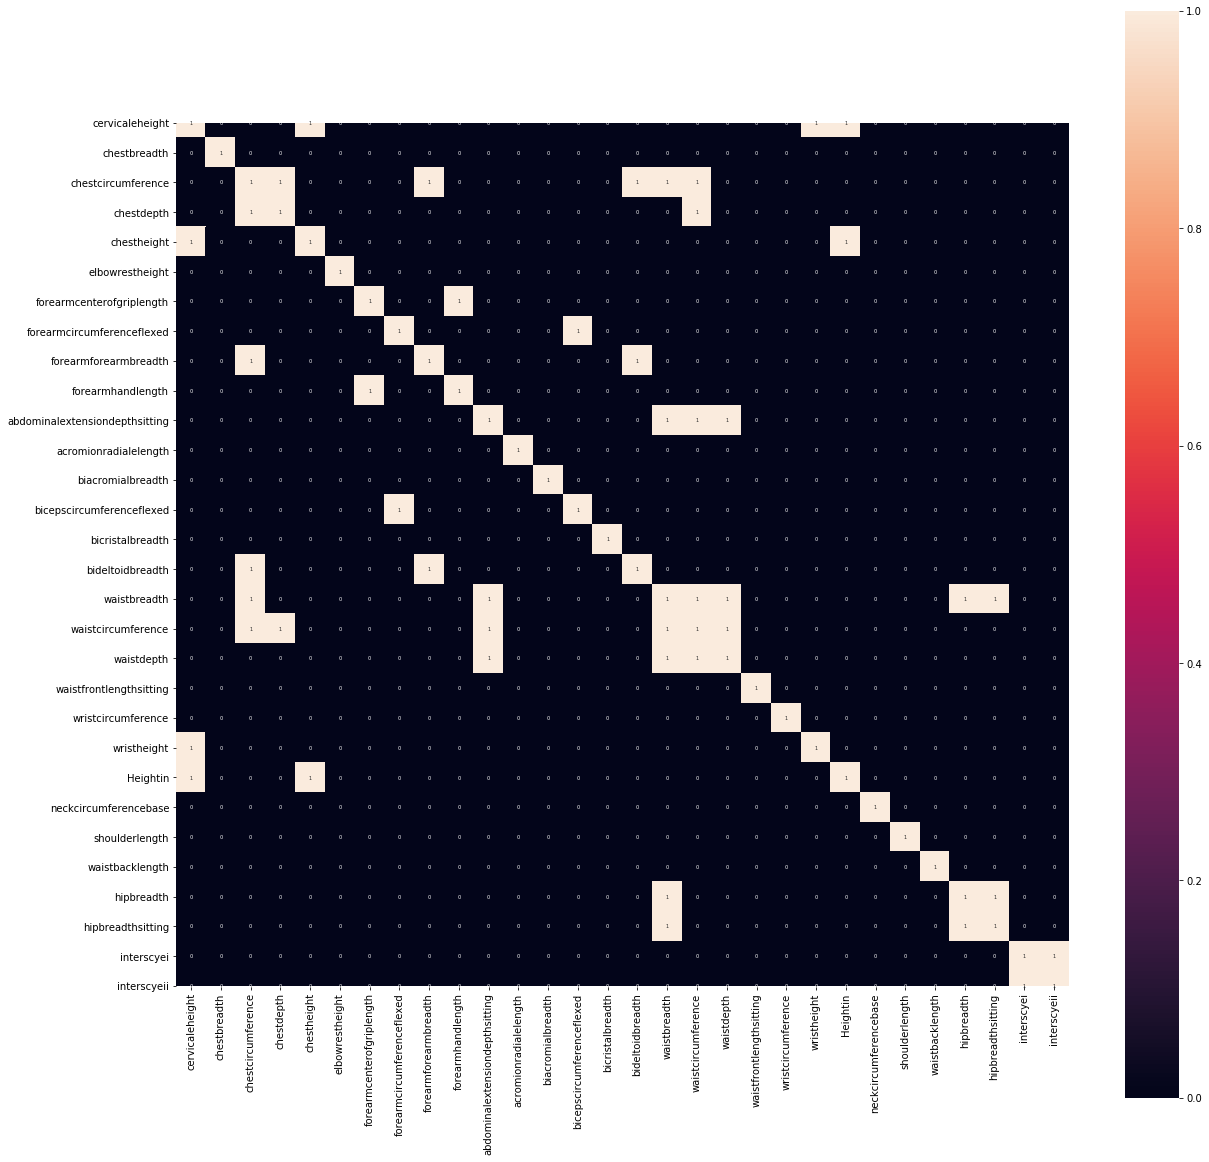

In [385]:
plt.figure(figsize=(20,20))
ax = sn.heatmap(df.corr().abs().round(2)>=0.85, 
                 annot=True, annot_kws = { "size" : 5 }, square=True, cbar=True)

In [365]:
df_new = df[["Heightin", "neckcircumferencebase", "shoulderlength", "biacromialbreadth",
             "interscyei", "acromionradialelength", "forearmhandlength", "chestbreadth",
             "chestcircumference", "bicepscircumferenceflexed", "bicristalbreadth",
             "waistfrontlengthsitting", "wristcircumference"]]

In [366]:
mms = MinMaxScaler()
mms.fit(df_new) 
df_scaled = pd.DataFrame(mms.transform(df_new),
                        columns = df_new.columns)

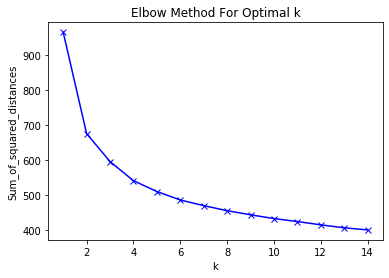

In [367]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [368]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [369]:
df_scaled["cluster"] = kmeans.labels_

In [370]:
df_scaled["cluster"].value_counts()

0    868
5    816
3    722
2    709
1    488
4    479
Name: cluster, dtype: int64

In [371]:
x_train, x_test, y_train, y_test = train_test_split(
    df_scaled.drop(['cluster'],axis=1), df_scaled['cluster'], test_size=.25, random_state=42)

In [372]:
model_logit = LogisticRegression(solver = 'lbfgs')
model_logit.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [373]:
# use the model to make predictions with the test data
y_pred = model_logit.predict(x_test)
# how did our model perform?
round(model_logit.score(x_train,y_train)*100,3)


89.415

In [374]:
print("Mean Squared Error",round(mean_squared_error(y_test,y_pred),3))
#print("Roc Auc Score",round(roc_auc_score(y_test,y_pred)*100,3),"%")
#print("Mean of Cross-Validation Scores",round(cross_val_score(model_logit,df_scaled.drop(['cluster'],axis=1), 
                                                    #df_scaled['cluster'],cv=5,scoring='roc_auc').mean(),3))
print("-"*100)
print(confusion_matrix(y_test, y_pred))
print("-"*100)
print(classification_report(y_test, y_pred))

Mean Squared Error 0.545
----------------------------------------------------------------------------------------------------
[[197   0   2   0   0   5]
 [ 11 105   0  10   0   0]
 [ 29   0 148   0   0   9]
 [  5   0   0 164   0   3]
 [  0   0   6   0 117  12]
 [  2   0   0   8   0 188]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       204
           1       1.00      0.83      0.91       126
           2       0.95      0.80      0.87       186
           3       0.90      0.95      0.93       172
           4       1.00      0.87      0.93       135
           5       0.87      0.95      0.91       198

    accuracy                           0.90      1021
   macro avg       0.92      0.89      0.90      1021
weighted avg       0.91      0.90      0.90      1021



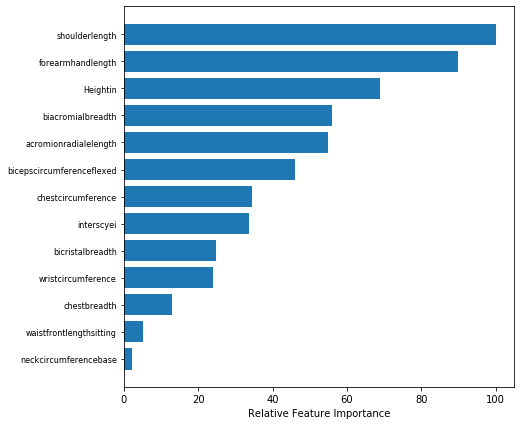

In [375]:
feature_importance_l = abs(model_logit.coef_[0])
feature_importance_l = 100.0 * (feature_importance_l / feature_importance_l.max())
sorted_idx = np.argsort(feature_importance_l)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(7,7))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance_l[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(df_scaled.drop(['cluster'],axis=1).columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.show()
#However the sklearn.linear_model.LogisticRegression does not provide the p-values so we are not able to make
#any inference about the significance of each independent variable, for that reasons statsmodel

In [376]:
model_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
model_rf.fit(x_train,y_train)

print("Accuracy on train set",round(model_rf.score(x_train,y_train)*100,3),"%")
print("Accuracy on test set",round(model_rf.score(x_test,y_test)*100,3),"%")

rf_pred = model_rf.predict(x_test)
print("Mean Squared Error",round(mean_squared_error(y_test,rf_pred),3))

#print("Roc Auc Score",round(roc_auc_score(y_test,rf_pred)*100,3),"%")
#print("F1 score",round(f1_score(y_test,rf_pred, average='weighted')*100,3),"%")
#print("Mean of Cross-Validation Scores",round(cross_val_score(model_rf,x_scaled, 
 #                                                   y,cv=5,scoring='roc_auc').mean()*100,3),"%")
print("-"*100)
print(confusion_matrix(y_test, rf_pred))
print("-"*100)
print(classification_report(y_test, rf_pred))

Accuracy on train set 99.575 %
Accuracy on test set 82.272 %
Mean Squared Error 1.139
----------------------------------------------------------------------------------------------------
[[173   7   8   7   0   9]
 [  5 117   0   4   0   0]
 [ 24   0 143   0   3  16]
 [ 15   8   0 140   0   9]
 [  0   0  20   0 103  12]
 [  5   0   9  14   6 164]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       204
           1       0.89      0.93      0.91       126
           2       0.79      0.77      0.78       186
           3       0.85      0.81      0.83       172
           4       0.92      0.76      0.83       135
           5       0.78      0.83      0.80       198

    accuracy                           0.82      1021
   macro avg       0.83      0.83      0.83      1021
weighted avg       0.83      0.82      0.82      1021



In [377]:
params_rf = {'max_depth': [i for i in range(2,17)],
          'max_features': [i for i in range(2,10,2)],
          'min_samples_leaf': [3,7,8,10],
          'min_samples_split': [z for z in range(4,21,2)],
          'n_estimators':[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
          'bootstrap': [True, False]}

random_search_rf = RandomizedSearchCV(model_rf, param_distributions=params_rf, n_jobs=-1)
random_search_rf.fit(x_train,y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jo

In [378]:
random_search_rf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 14,
 'min_samples_leaf': 3,
 'max_features': 2,
 'max_depth': 15,
 'bootstrap': True}

In [379]:
tuned_rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators= 1800, 
                                  min_samples_split= 10, min_samples_leaf= 8,
                                  max_features= 2, max_depth=8, bootstrap=True)
tuned_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features=2,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=8,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=1800, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [380]:
print("Accuracy on train set",round(tuned_rf.score(x_train,y_train)*100,3),"%")
print("Accuracy on test set",round(tuned_rf.score(x_test,y_test)*100,3),"%")

tuned_rf_pred = tuned_rf.predict(x_test)
print("Mean Squared Error",round(mean_squared_error(y_test,tuned_rf_pred),3))

print("-"*100)
print(confusion_matrix(y_test, tuned_rf_pred))
print("-"*100)
print(classification_report(y_test, tuned_rf_pred))

Accuracy on train set 95.23 %
Accuracy on test set 88.247 %
Mean Squared Error 0.823
----------------------------------------------------------------------------------------------------
[[169   7  12   8   0   8]
 [  3 119   0   4   0   0]
 [  9   0 159   0   4  14]
 [ 11   3   0 152   0   6]
 [  0   0   8   0 125   2]
 [  3   0   3  10   5 177]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       204
           1       0.92      0.94      0.93       126
           2       0.87      0.85      0.86       186
           3       0.87      0.88      0.88       172
           4       0.93      0.93      0.93       135
           5       0.86      0.89      0.87       198

    accuracy                           0.88      1021
   macro avg       0.89      0.89      0.89      1021
weighted avg       0.88      0.88      0.88      1021



In [381]:
importances = tuned_rf.feature_importances_
features = pd.DataFrame(data = importances, columns = ["importance"], 
                        index = df_scaled.drop(['cluster'],axis=1).columns)
features.sort_values('importance',ascending=False)

,importance
chestcircumference,0.154468
biacromialbreadth,0.103177
forearmhandlength,0.095693
chestbreadth,0.090584
neckcircumferencebase,0.086331
Heightin,0.084337
acromionradialelength,0.075521
interscyei,0.066420
bicepscircumferenceflexed,0.059941
wristcircumference,0.056341
